### Individual Homework

#### Enter your name here: Alexandra Romanova

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Analysis of movies IMDB dataset**

We will look at a ***subset*** sample of movies, taken from the [Kaggle IMDB 5000 movie dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [89]:
movies = pd.read_csv('../Data/movies.csv')
movies

,title,genre,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
0,Avatar,Action,James Cameron,2009,178,760505847,237000000,4834,886204,3777,7.9
1,Titanic,Drama,James Cameron,1997,194,658672302,200000000,45223,793059,2843,7.7
2,Jurassic World,Action,Colin Trevorrow,2015,124,652177271,150000000,8458,418214,1934,7.0
3,The Avengers,Action,Joss Whedon,2012,173,623279547,220000000,87697,995415,2425,8.1
4,The Dark Knight,Action,Christopher Nolan,2008,152,533316061,185000000,57802,1676169,5312,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2956,Locker 13,Thriller,Bruce Dellis,2014,95,2468,300000,2048,241,15,4.8
2957,The Ghastly Love of Johnny X,Comedy,Paul Bunnell,2012,106,2436,2000000,1611,344,113,5.7
2958,Detention of the Dead,Comedy,Alex Craig Mann,2012,87,1332,500000,2251,2038,49,4.6
2959,The Trials of Darryl Hunt,Crime,Ricki Stern,2006,106,1111,200000,2,771,21,7.7


Besides the obvious variables of `title`, `genre`, `director`, `year`, and `duration`, the rest of the variables are as follows:

-   `gross` : The gross earnings in the US box office, not adjusted for inflation
-   `budget`: The movie's budget
-   `cast_facebook_likes`: the number of facebook likes cast memebrs received
-   `votes`: the number of people who voted for (or rated) the movie in IMDB
-   `reviews`: the number of reviews for that movie
-   `rating`: IMDB average rating

**Produce a table with the count of movies by genre, ranked in descending order**


In [90]:
movies_genre = movies.groupby("genre").size().reset_index(name='count').sort_values(by='count', ascending=False)
movies_genre

,genre,count
4,Comedy,848
0,Action,738
7,Drama,498
1,Adventure,288
5,Crime,202
3,Biography,135
10,Horror,131
2,Animation,35
9,Fantasy,28
6,Documentary,25


**Produce a table with the average gross earning and budget (`gross` and `budget`) by genre. Calculate a variable `return_on_budget` which shows how many \$ did a movie make at the box office for each \$ of its budget. Ranked genres by this `return_on_budget` in descending order**

In [91]:
#new table with average gross and budget by genre

genre_gross_budget = movies.groupby("genre").agg(avg_gross = ('gross', 'mean'), avg_budget = ('budget', 'mean')).reset_index()
genre_gross_budget


,genre,avg_gross,avg_budget
0,Action,8.658386e+07,7.135489e+07
1,Adventure,9.579426e+07,6.629007e+07
2,Animation,9.843379e+07,6.170143e+07
3,Biography,4.520181e+07,2.854370e+07
4,Comedy,4.263055e+07,2.444632e+07
5,Crime,3.750240e+07,2.659617e+07
6,Documentary,1.735397e+07,5.887852e+06
7,Drama,3.746537e+07,2.624293e+07
8,Family,1.491605e+08,1.483333e+07
9,Fantasy,4.240884e+07,1.758214e+07


In [92]:
# adding the 2 needed columns 

genre_gross_budget['retun_on_budget'] = genre_gross_budget['avg_gross']/genre_gross_budget['avg_budget']
genre_gross_budget.sort_values(by='retun_on_budget', ascending=False)

,genre,avg_gross,avg_budget,retun_on_budget
11,Musical,9.208400e+07,3.189500e+06,28.870983
8,Family,1.491605e+08,1.483333e+07,10.055763
16,Western,2.082188e+07,3.465000e+06,6.009202
6,Documentary,1.735397e+07,5.887852e+06,2.947420
10,Horror,3.771374e+07,1.350492e+07,2.792593
9,Fantasy,4.240884e+07,1.758214e+07,2.412040
4,Comedy,4.263055e+07,2.444632e+07,1.743843
12,Mystery,6.753302e+07,3.921875e+07,1.721958
2,Animation,9.843379e+07,6.170143e+07,1.595324
3,Biography,4.520181e+07,2.854370e+07,1.583600


**Produce a table that shows the top 15 directors who have created the highest gross revenue in the box office. Don't just show the total gross amount, but also the mean, median, and standard deviation per director**

In [93]:
# create columns with statistics of gross by director
direct_movies = movies.groupby("director").agg(total_gross = ('gross', 'sum'), mean_gross = ('gross', 'mean'), median_gross = ('gross', 'median'), sd_gross = ('gross', 'std'))

#sort the directors by total gross and show the top 15
direct_movies.sort_values(by='total_gross', ascending=False).head(15)

,total_gross,mean_gross,median_gross,sd_gross
director,,,,
Steven Spielberg,4014061704,1.745244e+08,164435221.0,1.014211e+08
Michael Bay,2231242537,1.716340e+08,138396624.0,1.271616e+08
Tim Burton,2071275480,1.294547e+08,76519172.0,1.087269e+08
Sam Raimi,2014600898,2.014601e+08,234903076.0,1.621266e+08
James Cameron,1909725910,3.182877e+08,175562880.5,3.091713e+08
Christopher Nolan,1813227576,2.266534e+08,196667606.5,1.872241e+08
George Lucas,1741418480,3.482837e+08,380262555.0,1.461939e+08
Robert Zemeckis,1619309108,1.245622e+08,100853835.0,9.130028e+07
Clint Eastwood,1378321100,7.254322e+07,46700000.0,7.548741e+07


**Produce a table that describes how ratings are distributed by genre. We don't want just the mean, but also, min, max, median, SD and some kind of a histogram or density graph that visually shows how ratings are distributed.**

In [94]:
ratings_genre = movies.groupby('genre').agg(avg_rating = ('rating', 'mean'), median_rating = ('rating', 'median'), sd_rating = ('rating', 'std'), min_rating = ('rating', 'min'), max_rating = ('rating', 'max')).reset_index()
ratings_genre.sort_values(by='avg_rating', ascending=False)

,genre,avg_rating,median_rating,sd_rating,min_rating,max_rating
3,Biography,7.114074,7.20,0.759827,4.5,8.9
5,Crime,6.915347,6.90,0.849356,4.8,9.3
12,Mystery,6.856250,6.90,0.881641,4.6,8.5
11,Musical,6.750000,6.75,0.636396,6.3,7.2
7,Drama,6.731526,6.80,0.916993,2.1,8.8
6,Documentary,6.660000,7.40,1.766588,1.6,8.5
14,Sci-Fi,6.657143,6.40,1.093705,5.0,8.2
2,Animation,6.651429,6.90,0.968131,4.5,8.0
13,Romance,6.650000,6.65,0.636396,6.2,7.1
1,Adventure,6.506597,6.60,1.093881,2.3,8.6


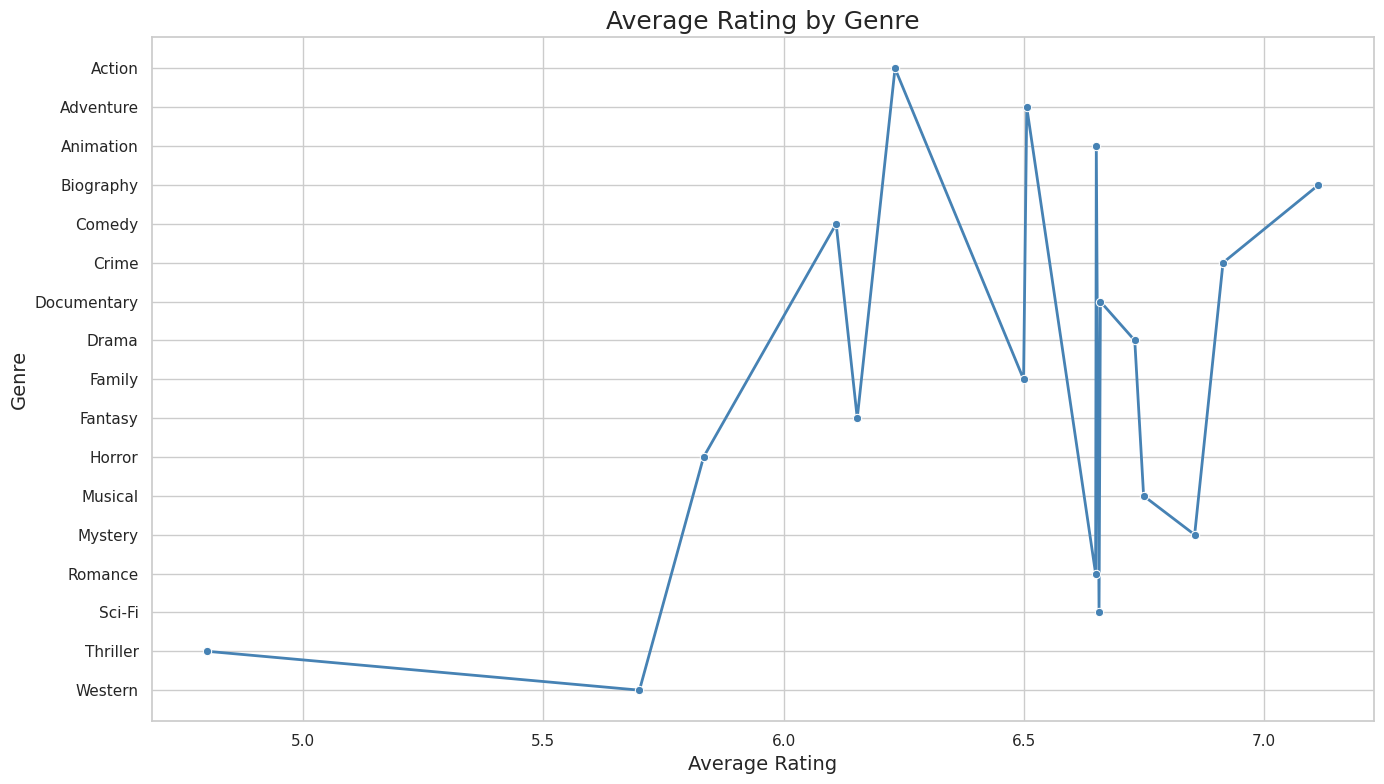

In [95]:
# average rating for each genre

plt.figure(figsize=(14, 8))

sns.lineplot(
    data=ratings_genre,
    x='avg_rating',
    y='genre',
    marker='o',
    linewidth=2,
    color='steelblue'
)

plt.title('Average Rating by Genre', fontsize=18)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.tight_layout()
plt.show()


**Challenge - Produce a table of your own choosing, something you think is important/interesting to have data for, justify your result by writting a 2 sentence explanation/interpretation of the result.**

For me it was interesting to see from which decade movies have the highest average ratings. Based on that we could make a conlusion which movies are preffered among the public in general.

In [96]:
# decade column
movies['decade'] = (movies['year'] // 10) * 10

# Group by decade
ratings_by_decade = movies.groupby('decade').agg(
    avg_rating=('rating', 'mean'),
    median_rating=('rating', 'median'),
    count_movies=('title', 'count')
).reset_index()

# Sort by average rating
ratings_by_decade = ratings_by_decade.sort_values(by='avg_rating', ascending=False)

# Display table
ratings_by_decade

,decade,avg_rating,median_rating,count_movies
1,1930,8.016667,7.95,6
4,1960,7.690000,7.85,10
2,1940,7.460000,7.50,5
5,1970,7.405405,7.60,37
3,1950,7.283333,6.90,6
6,1980,6.674432,6.80,176
7,1990,6.509302,6.60,602
9,2010,6.374463,6.50,791
8,2000,6.253318,6.40,1326
0,1920,5.550000,5.55,2


/tmp/ipykernel_2920/871190091.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


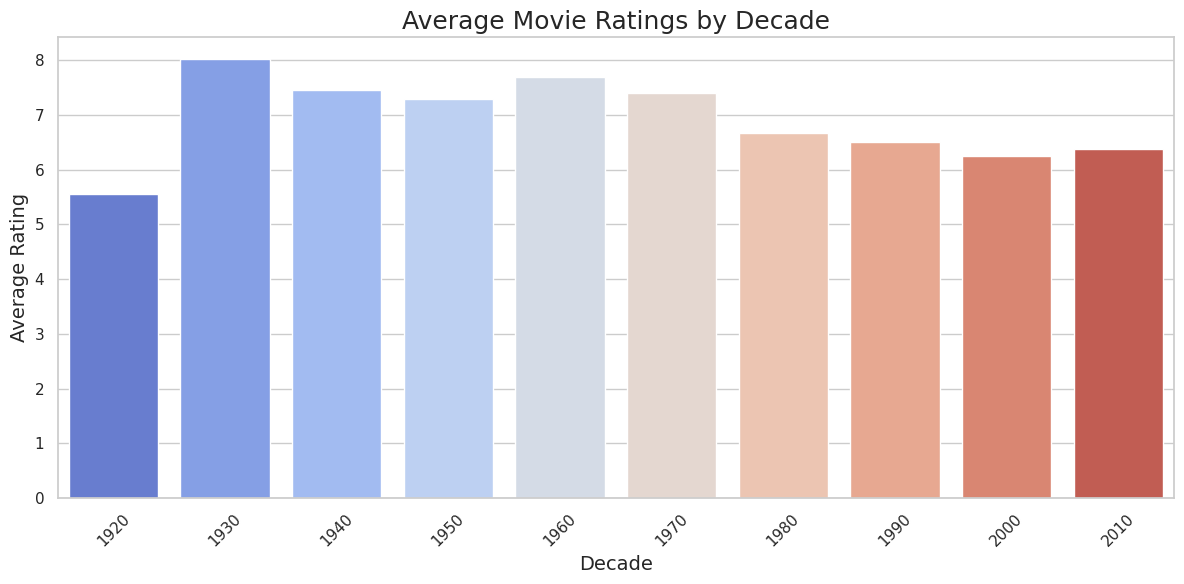

In [97]:
plt.figure(figsize=(12, 6))

sns.barplot(
    data=ratings_by_decade,
    x='decade',
    y='avg_rating',
    palette='coolwarm'
)

plt.title('Average Movie Ratings by Decade', fontsize=18)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Movies from 1930, 1960 and 1970 had the highest ratings. This might indicate that movies produced during these decades were one of the most influential works. 

#### Use visualisation to answer the following questions

**Examine the relationship between `gross` and `cast_facebook_likes`. Produce a scatterplot and write one sentence discussing whether the number of facebook likes that the cast has received is likely to be a good predictor of how much money a movie will make at the box office. What variable are you going to map to the Y- and X- axes?**

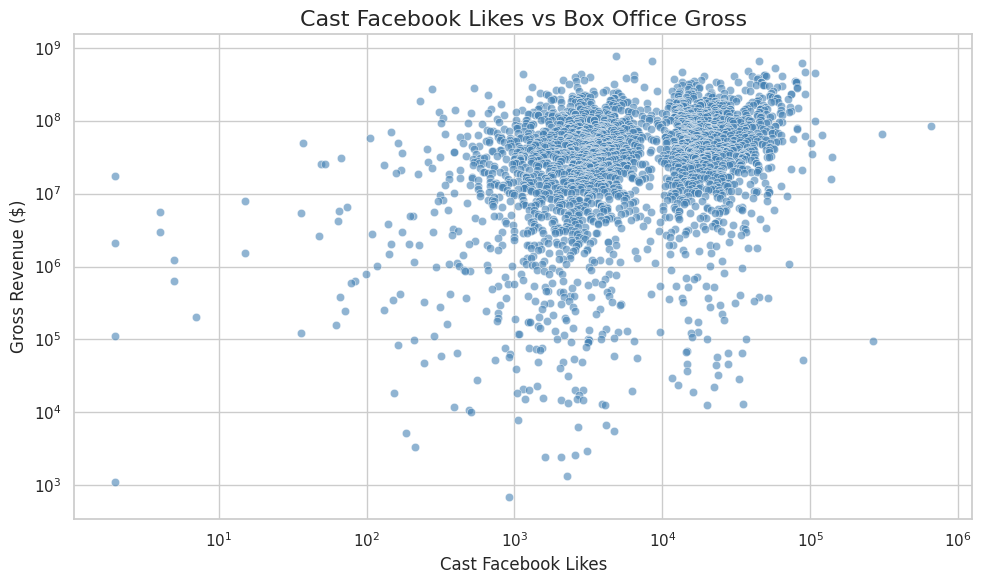

In [98]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data = movies, x = 'cast_facebook_likes', y = 'gross', alpha = 0.6, color = 'steelblue')

plt.title('Cast Facebook Likes vs Box Office Gross', fontsize=16)
plt.xlabel('Cast Facebook Likes', fontsize=12)
plt.ylabel('Gross Revenue ($)', fontsize=12)
plt.yscale('log')  # helps visualize wide range of gross values
plt.xscale('log')  # helps spread out skewed data
plt.tight_layout()
plt.show()


There is a somewhat positive relationship between Facebook likes and the Box Office Gross, however this relationship is weak. It suggests that movies that have more likes on Facebook make a bit more money then the ones that received less likes, however, **Facebook likes are not a good predictor for Box Office Gross**, especially on their own.

**Examine the relationship between `gross` and `budget`. Produce a scatterplot and write one sentence discussing whether budget is likely to be a good predictor of how much money a movie will make at the box office.**

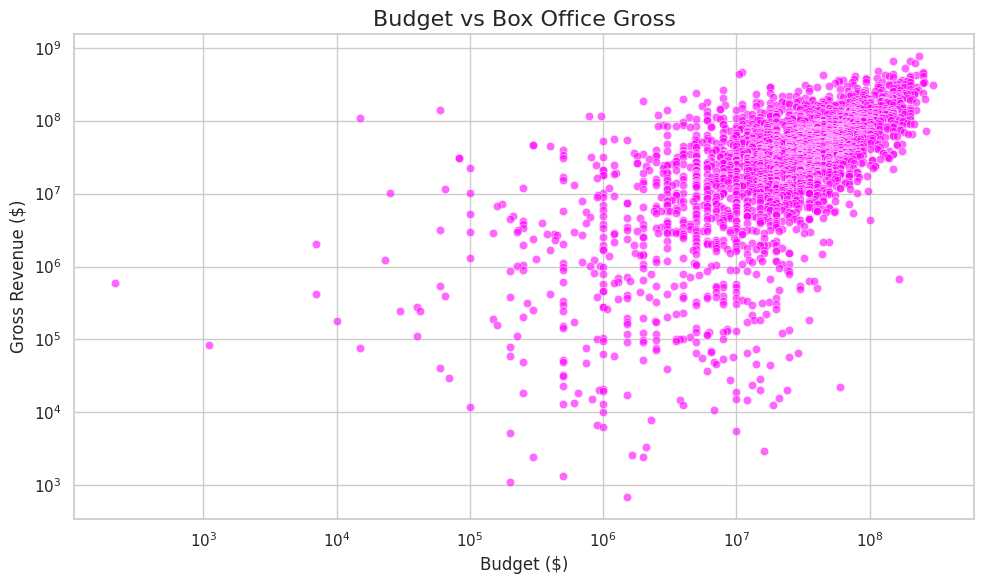

In [99]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data = movies, x = 'budget', y = 'gross', alpha = 0.6, color = 'magenta')
plt.title('Budget vs Box Office Gross', fontsize=16)
plt.xlabel('Budget ($)', fontsize=12)
plt.ylabel('Gross Revenue ($)', fontsize=12)
plt.yscale('log')  # helps visualize wide range of gross values
plt.xscale('log')  # helps spread out skewed data
plt.tight_layout()
plt.show()

This plot shows moderate positive relationship between budget and box office gross. It suggests that movies with higher budgets tend to make more money. It is a better predictor than Facebook likes, but still not that precise on its own.

**Examine the relationship between `gross` and `rating`. Produce a scatterplot, faceted by `genre` and discuss whether IMDB ratings are likely to be a good predictor of how much money a movie will make at the box office. Is there anything strange in this dataset?**

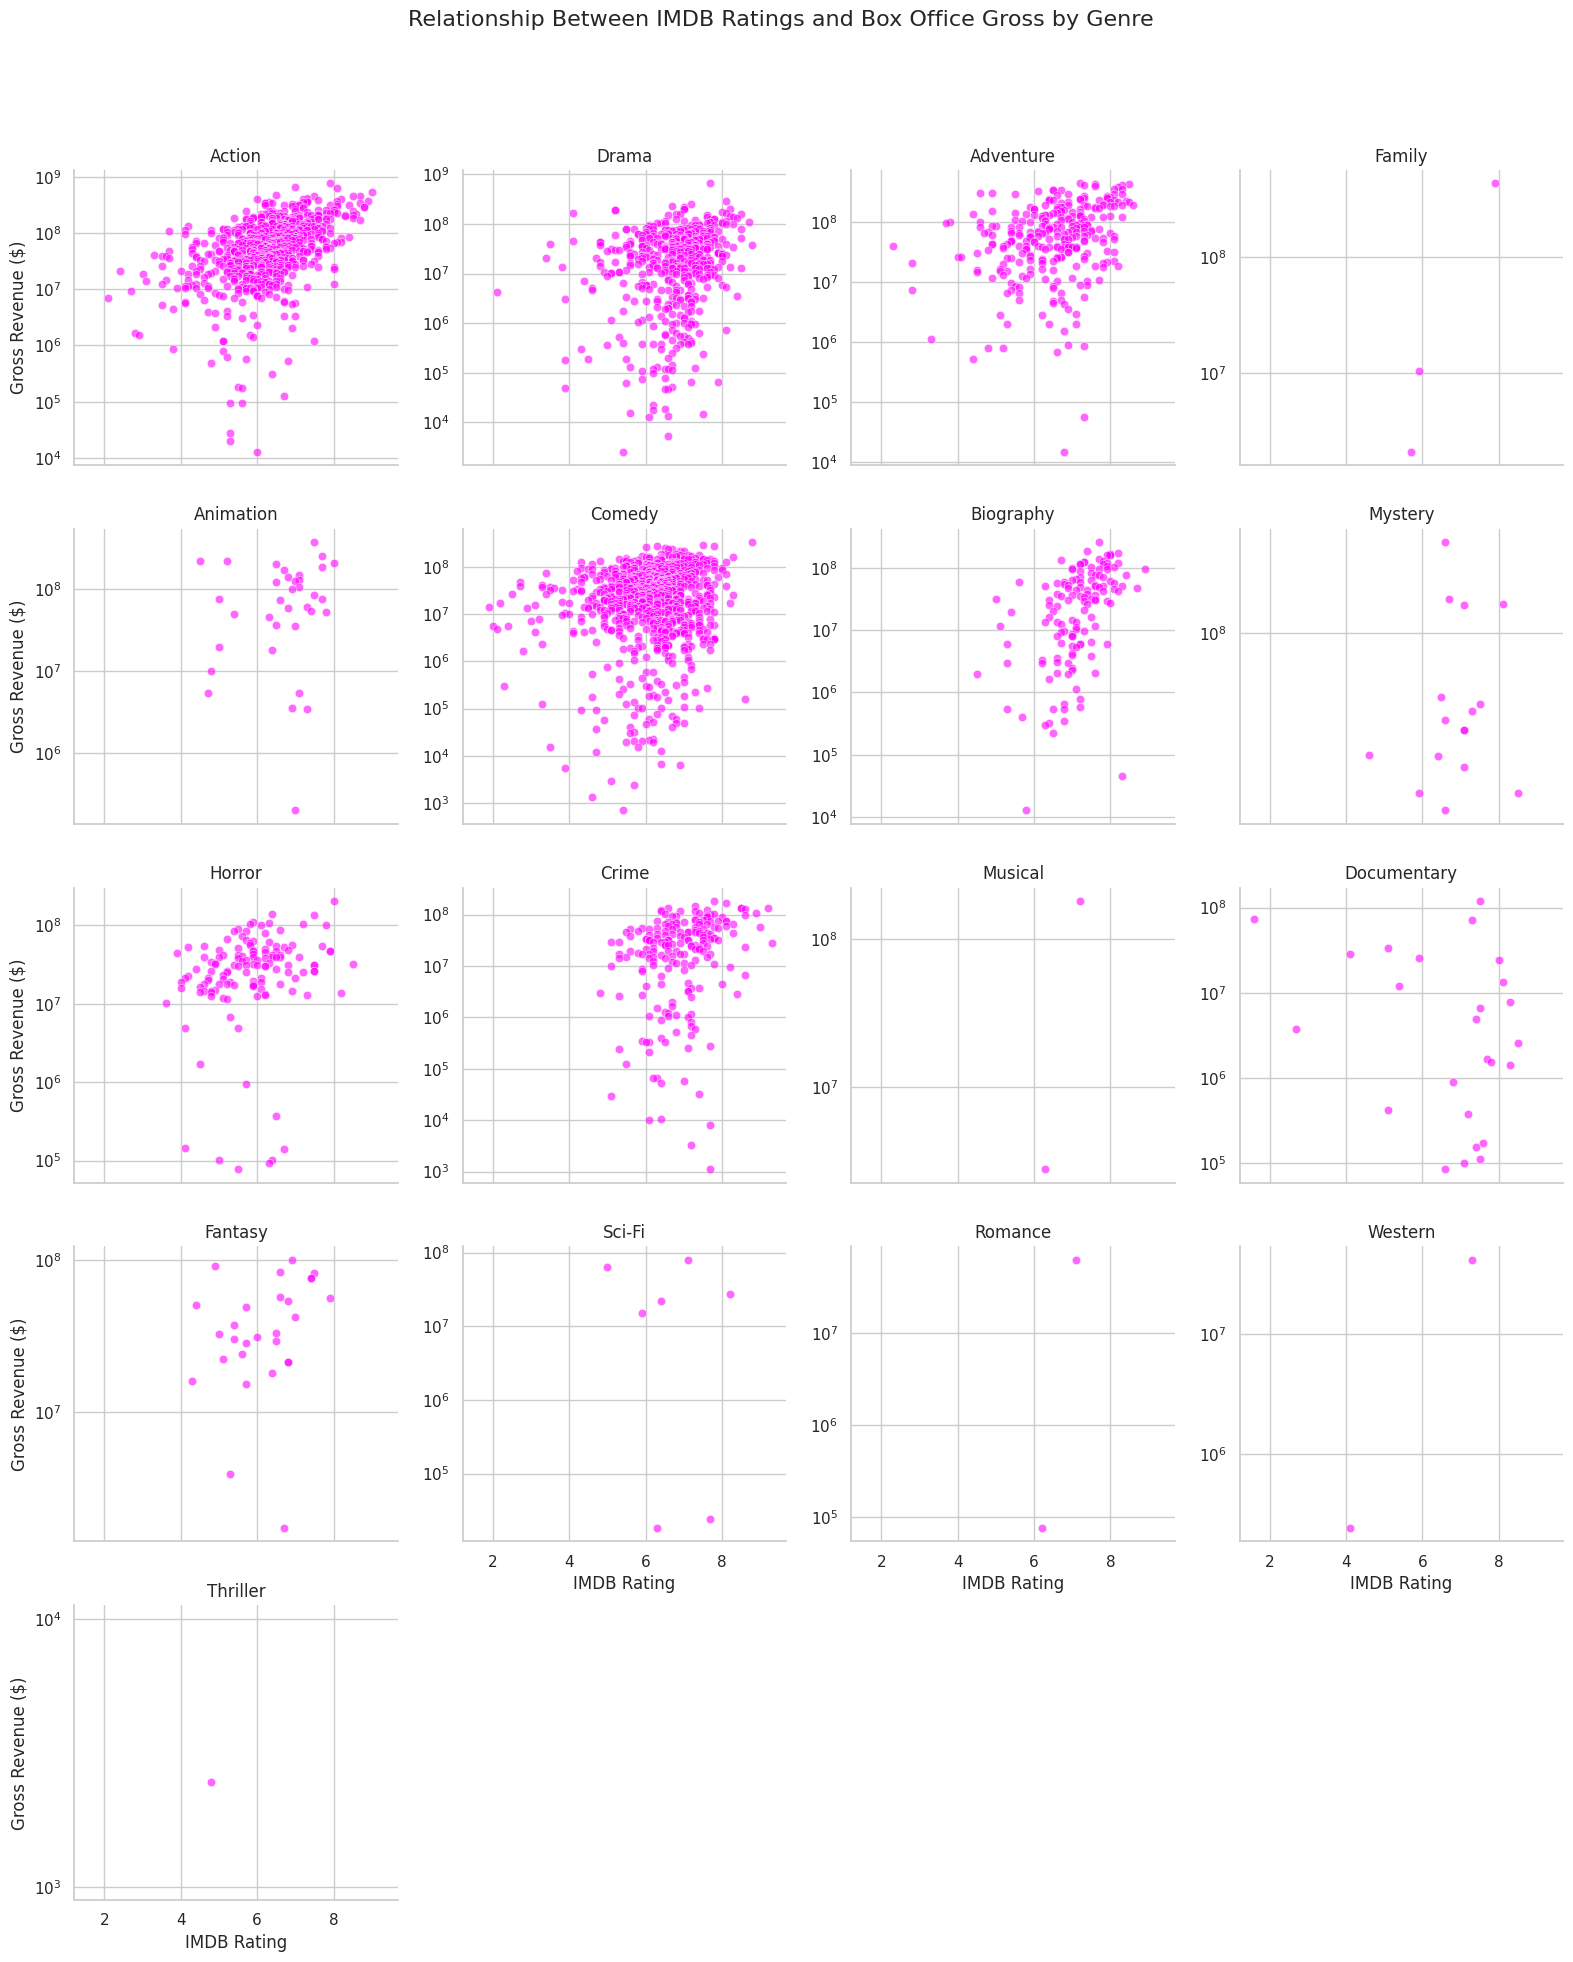

In [100]:
# faceted scatterplot by genre
g = sns.FacetGrid(movies, col='genre', col_wrap=4, height=4, sharey=False)
g.map_dataframe(
    sns.scatterplot,
    x='rating',
    y='gross',
    alpha=0.6,
    color='magenta'
)

g.set_axis_labels("IMDB Rating", "Gross Revenue ($)")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    ax.set_yscale('log')  # log scale for better visualization of revenue spread

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Relationship Between IMDB Ratings and Box Office Gross by Genre", fontsize=16)
plt.show()



In majority of genres, there is no strong relationship between IMBD ratings and box office revenue, it is rather moderate. Some genres, like Action, Comedy, Drama, have stronger relationship between ratings and revenue, suggesting that the higher the rating is, the higher the revenue tends to be for those particular film genres. For some genres (Romance, Musical, Western, Family) there are not enough observations to make any conclusion.

**Challenge - Produce a visualisation of your choosing, something you think is important to explore/investigate visually. Do make it a comprehensive graph and not a single histogram or density plot. Make it publication ready, label your axes, give it a title, choose colouring options, appropirately formatted text etc.**

In [101]:
movies['director'].nunique()

1366

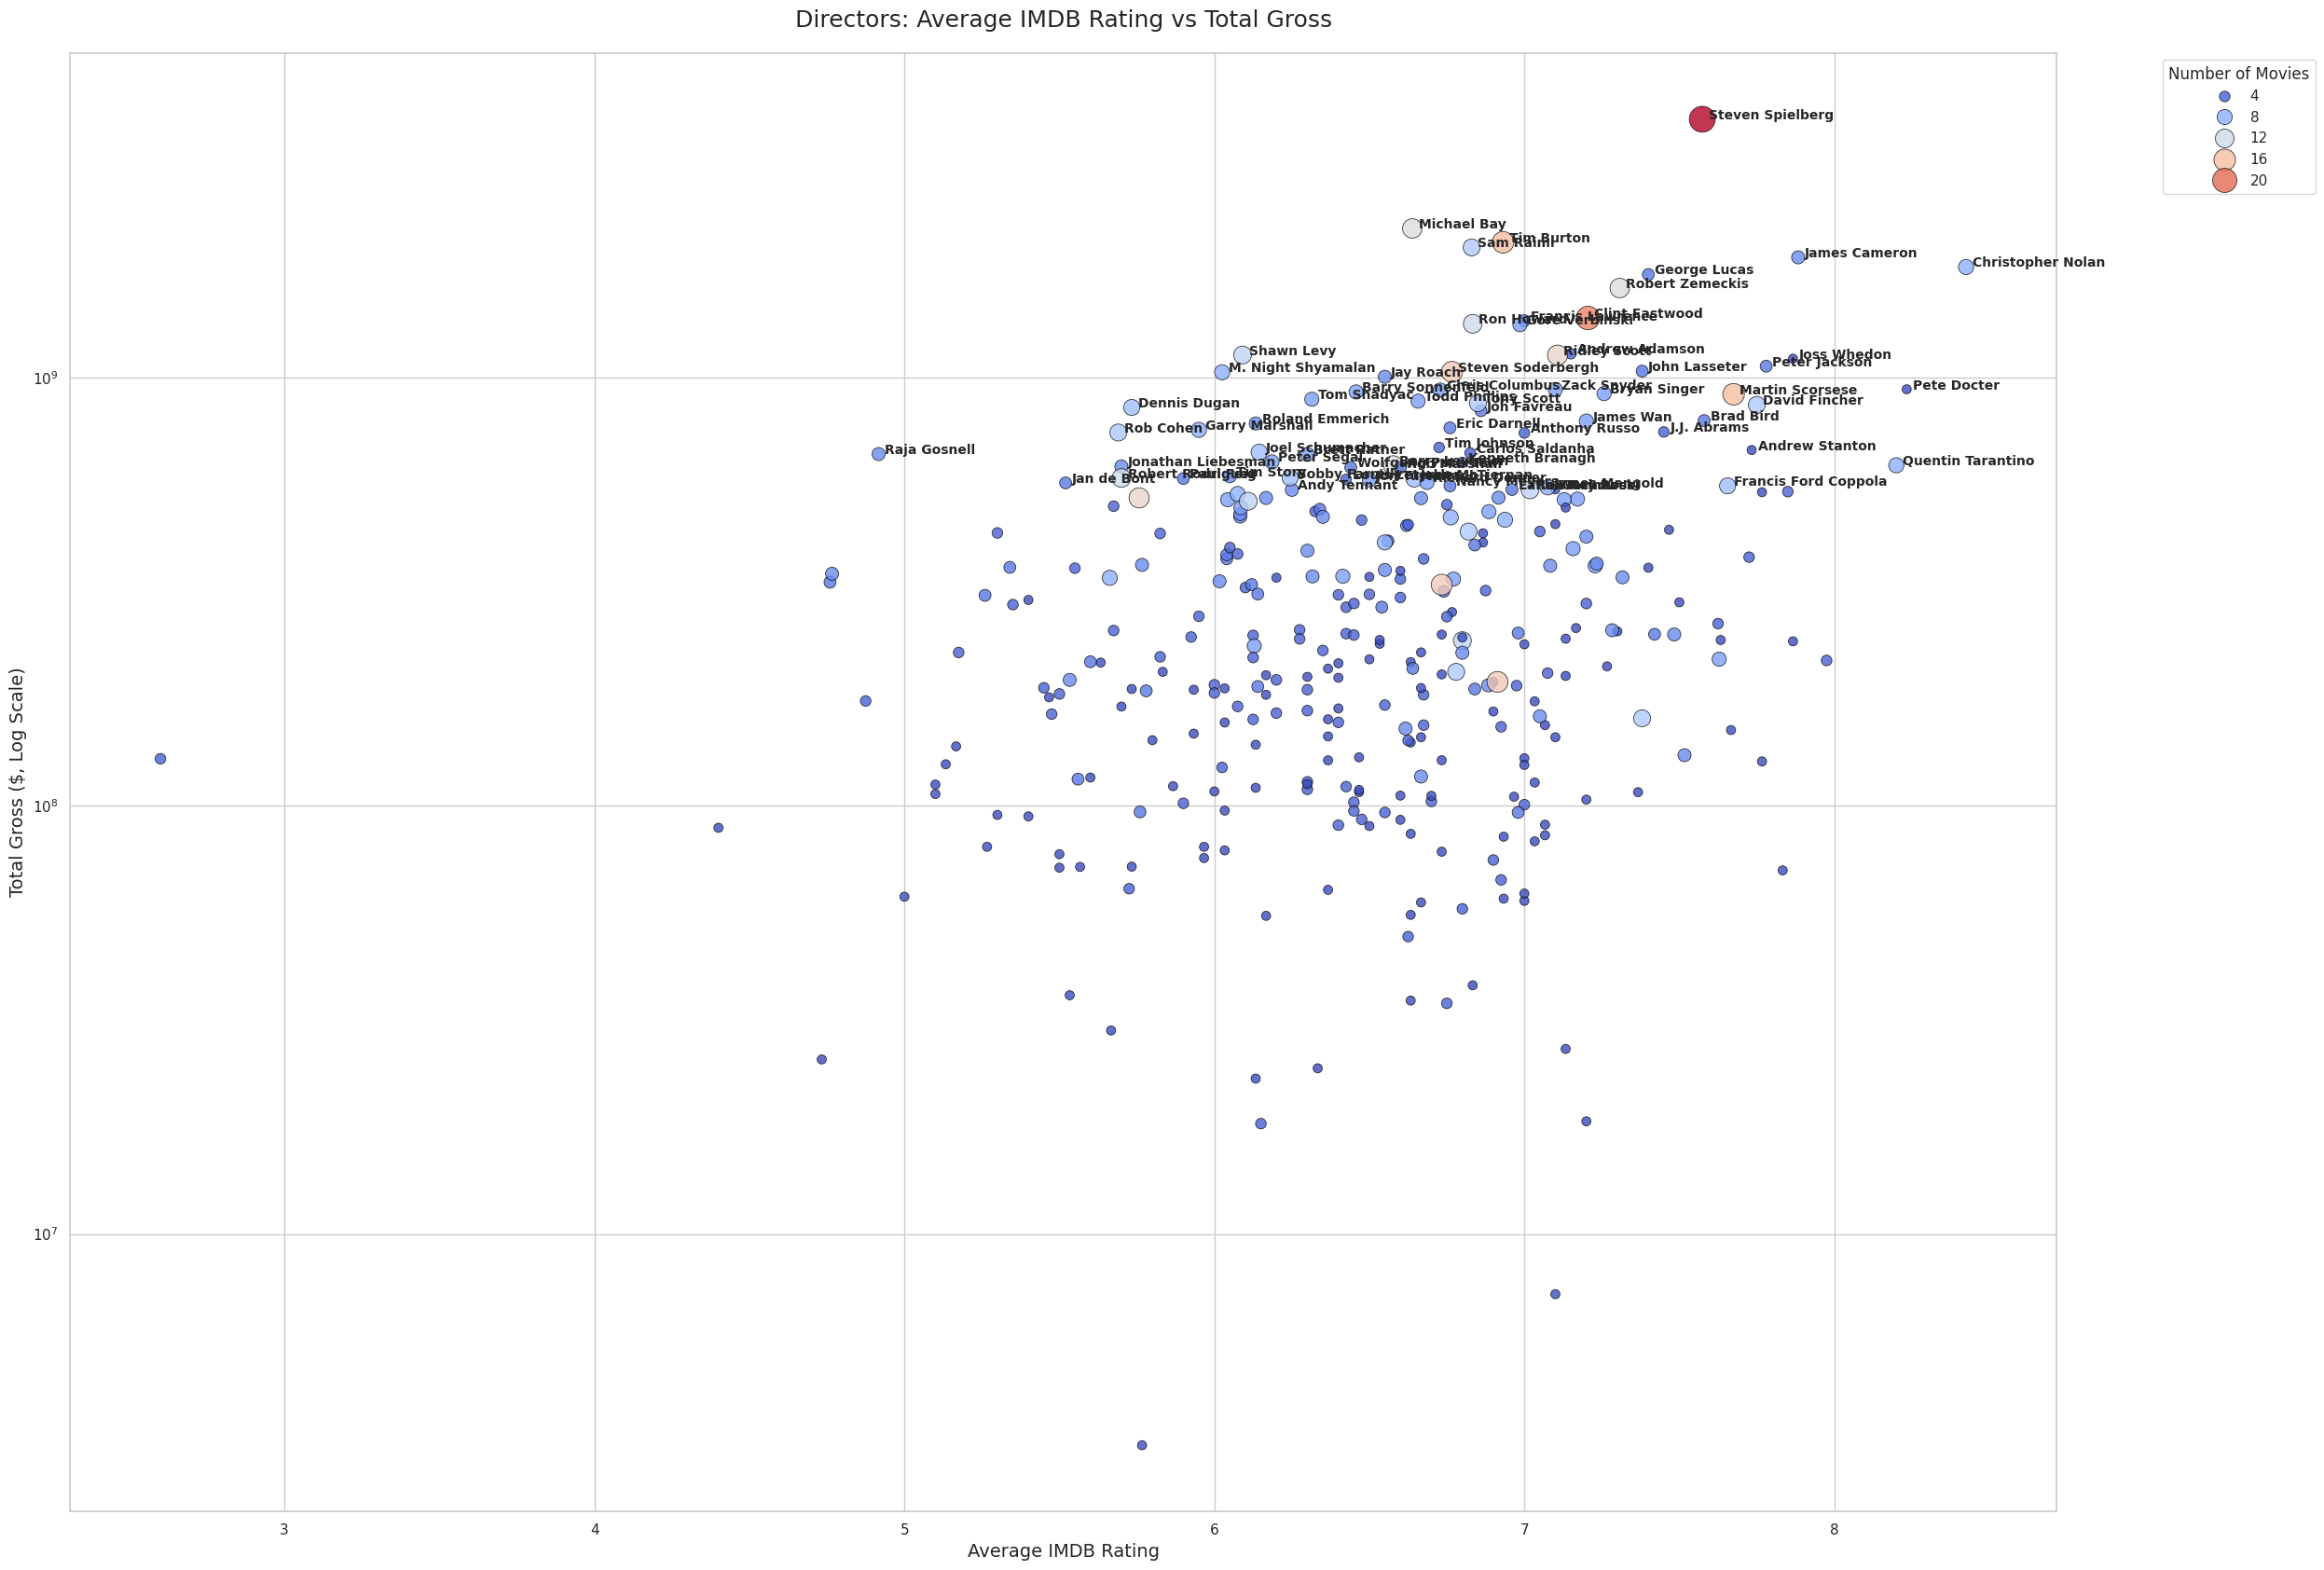

In [102]:
# existing grouped data with added metrics
direct_movies = movies.groupby("director").agg(
    total_gross=('gross', 'sum'),
    mean_gross=('gross', 'mean'),
    median_gross=('gross', 'median'),
    sd_gross=('gross', 'std'),
    avg_rating=('rating', 'mean'),
    movie_count=('title', 'count')
).reset_index()

# filter to directors with at least 3 movies for reliability
direct_movies = direct_movies[direct_movies['movie_count'] >= 3]

# sort, then pick top 50 directors by total gross
top_directors = direct_movies.sort_values(by='total_gross', ascending=False).head(70)

# Plot
plt.figure(figsize=(25, 17))
sns.scatterplot(
    data=direct_movies,
    x='avg_rating',
    y='total_gross',
    size='movie_count',
    sizes=(50, 400),
    hue='movie_count',
    palette='coolwarm',
    alpha=0.8,
    edgecolor='black'
)

plt.yscale('log')

# label the top directors
for _, row in top_directors.iterrows():
    plt.text(
        row['avg_rating'] + 0.02,    # slightly to the right
        row['total_gross'], 
        row['director'],
        fontsize=10,
        weight='bold'
    )

# labels
plt.title('Directors: Average IMDB Rating vs Total Gross', fontsize=18, pad=20)
plt.xlabel('Average IMDB Rating', fontsize=14)
plt.ylabel('Total Gross ($, Log Scale)', fontsize=14)

# legend on the upper left outside the plot
plt.legend(title='Number of Movies', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


Based on the plot we can make the following conclusions about the directors:
- Christopher Nolan, James Cameron, Tim Burton, Steven Spielberg create **high-rated movies with high gross** (situated in the top-right on the plot).
- Michael Bay is situated on the top-left, which indicates that his movies make **strong revenue** but the **ratings of these movies are not that high**.
- Quentin Tarantino, Francis Ford Coppola appear closer to bottom-right, showing that meanwhile having **high ratings**, their films **do not make as much revenue**.

### Deliverables

Poduce a clean, stand-alone notebook (or HTML export) with:

All tables/plots properly labeled

Brief interpretations where requested

Upload final HTML/Notebook.